In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import scipy.io
import os
import sys
import glob
import pandas as pd
from scipy import signal
# サンプリング周波数は300Hz

In [2]:
os.listdir('./physionet.org/files/challenge-2017/1.0.0/training/')

['SHA1SUMS',
 'REFERENCE-v1.csv',
 'MD5SUMS',
 'A03',
 'RECORDS-noisy',
 'SHA256SUMS',
 'RECORDS',
 'A07',
 'REFERENCE.csv',
 'REFERENCE-v3.csv',
 'A04',
 'RECORDS-other',
 'A08',
 'A05',
 'RECORDS-af',
 'A00',
 'RECORDS-normal',
 'REFERENCE-v0.csv',
 'A02',
 'A06',
 'index.html',
 'REFERENCE-v2.csv',
 'A01']

In [3]:
data_path_head = ('./physionet.org/files/challenge-2017/1.0.0/training/')
data_path_a00 = glob.glob(data_path_head + '/A00')
data_path_a00_str = ''.join(data_path_a00)
print(data_path_a00_str)

./physionet.org/files/challenge-2017/1.0.0/training//A00


In [4]:
data_path_a00_001 = glob.glob(data_path_a00_str + '/*013.mat')
data_path_a00_001_str = ''.join(data_path_a00_001)
print(data_path_a00_001_str)

./physionet.org/files/challenge-2017/1.0.0/training//A00/A00013.mat


In [5]:
# MATLABファイルの読み込み
data_a00_001 = scipy.io.loadmat(data_path_a00_001_str)
print(type(data_a00_001))
display(data_a00_001)

<class 'dict'>


{'val': array([[-20, -27, -33, ..., -16, -22, -26]], dtype=int16)}

In [6]:
display(data_a00_001.keys())
print('=============')
display(data_a00_001.values())

dict_keys(['val'])

dict_values([array([[-20, -27, -33, ..., -16, -22, -26]], dtype=int16)])

In [7]:
print(data_path_a00_001_str[-15:])

/A00/A00013.mat


In [8]:
data_a00_001_list = list(data_a00_001.values())
display(data_a00_001_list)
print(type(data_a00_001_list))

[array([[-20, -27, -33, ..., -16, -22, -26]], dtype=int16)]

<class 'list'>


In [9]:
for index, value in enumerate(np.ravel(data_a00_001_list)):
    print(index)
    print(value)
    if index ==6:
        break
     

0
-20
1
-27
2
-33
3
-38
4
-44
5
-50
6
-54


In [10]:
df_a00_001 = pd.DataFrame(np.ravel(data_a00_001_list))
display(df_a00_001)

,0
0,-20
1,-27
2,-33
3,-38
4,-44
...,...
8995,-3
8996,-9
8997,-16
8998,-22


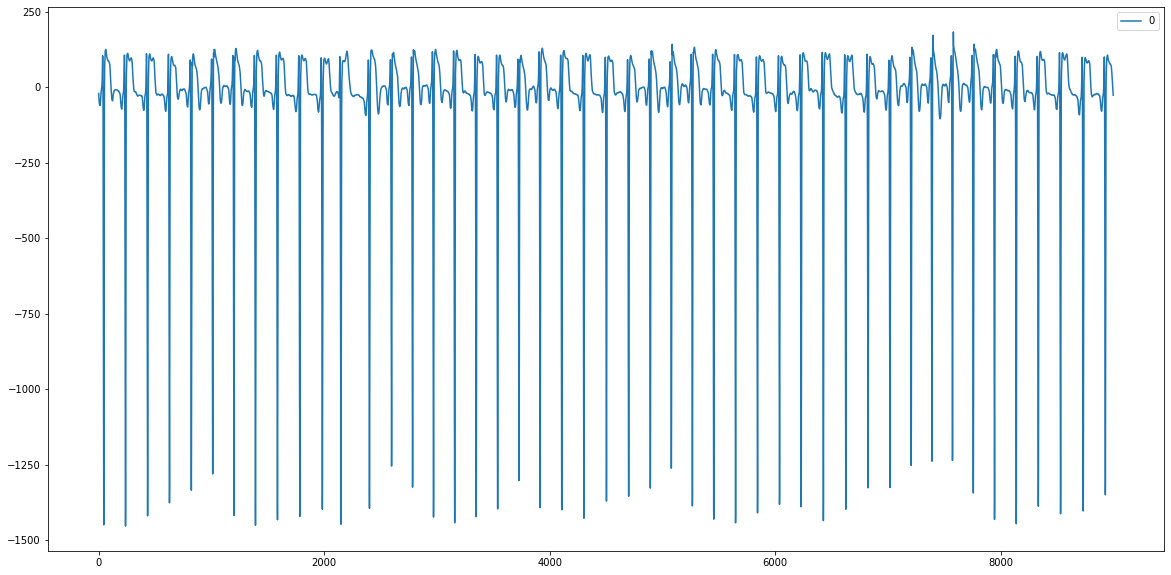

In [11]:
df_a00_001.plot(figsize=(20,10))

In [12]:
df_a00_001.columns = ['a00_001']
df_a00_001['detrend'] = signal.detrend(df_a00_001)

In [13]:
display(df_a00_001)

,a00_001,detrend
0,-20,-7.105427e-15
1,-27,-7.105427e-15
2,-33,-1.421085e-14
3,-38,-1.421085e-14
4,-44,-2.131628e-14
...,...,...
8995,-3,-8.881784e-16
8996,-9,-1.776357e-15
8997,-16,-3.552714e-15
8998,-22,-1.065814e-14


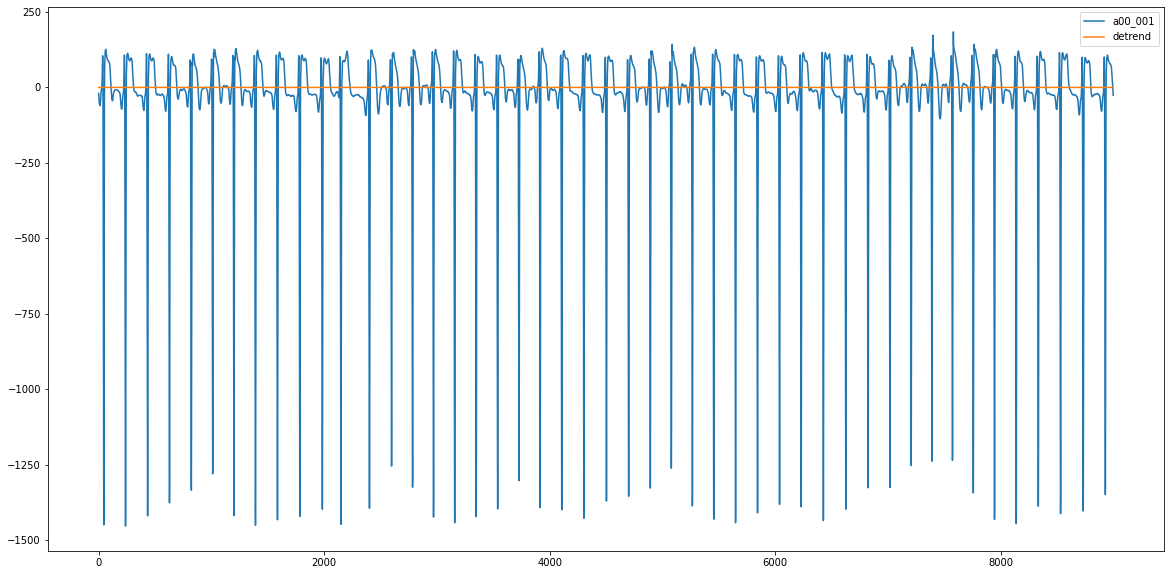

In [14]:
df_a00_001.plot(figsize=(20,10))
plt.legend(loc='best')

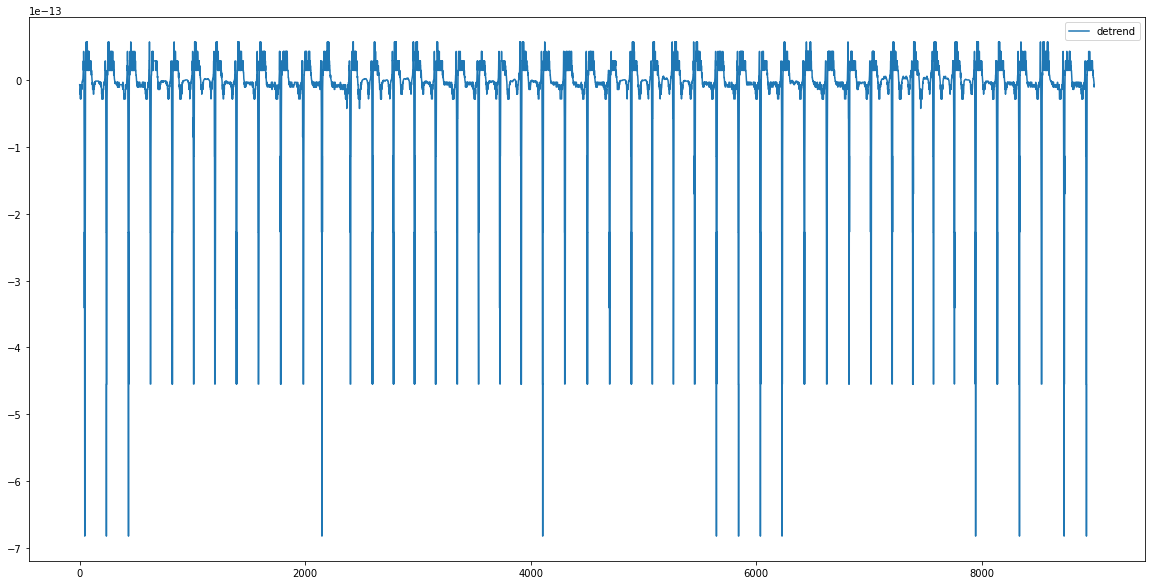

In [15]:
df_a00_001['detrend'].plot(figsize=(20,10))
plt.legend(loc='best')

In [16]:
display(df_a00_001.index)

RangeIndex(start=0, stop=9000, step=1)

In [17]:
df_a00_001_reset_index = df_a00_001.reset_index()
df_a00_001_reset_index = df_a00_001_reset_index.rename(columns={'index': 'time'})
display(df_a00_001_reset_index)

,time,a00_001,detrend
0,0,-20,-7.105427e-15
1,1,-27,-7.105427e-15
2,2,-33,-1.421085e-14
3,3,-38,-1.421085e-14
4,4,-44,-2.131628e-14
...,...,...,...
8995,8995,-3,-8.881784e-16
8996,8996,-9,-1.776357e-15
8997,8997,-16,-3.552714e-15
8998,8998,-22,-1.065814e-14


In [18]:
numtaps = 51 #FIRフイルターの長さ
cutoff = [0.05, 100]
N = len(df_a00_001_reset_index['detrend'])
fs = 300

filter_bandpass = signal.firwin(numtaps=numtaps, cutoff=cutoff,
                                fs=fs, pass_zero=False)
df_a00_001_reset_index['bandpass_005_100'] = signal.lfilter(filter_bandpass,
                                                            1, df_a00_001_reset_index['detrend'])
# df_a00_001_reset_index['bandpass_005_100'] = signal.lfilter(filter_bandpass,
#                                                             1, df_a00_001_reset_index['detrend'])
# df_a00_001_reset_index['bandpass_005_100'] = signal.lfilter(filter_bandpass,
#                                                             1, df_a00_001_reset_index['detrend'])
# df_a00_001_reset_index['bandpass_005_100'] = signal.lfilter(filter_bandpass,
#                                                             1, df_a00_001_reset_index['detrend'])
# df_a00_001_reset_index['bandpass_005_100'] = signal.lfilter(filter_bandpass,
#                                                             1, df_a00_001_reset_index['detrend'])
display(df_a00_001_reset_index)

,time,a00_001,detrend,bandpass_005_100
0,0,-20,-7.105427e-15,-6.078758e-18
1,1,-27,-7.105427e-15,-5.880699e-18
2,2,-33,-1.421085e-14,-3.691673e-18
3,3,-38,-1.421085e-14,-1.322677e-17
4,4,-44,-2.131628e-14,-1.071352e-17
...,...,...,...,...
8995,8995,-3,-8.881784e-16,2.668527e-14
8996,8996,-9,-1.776357e-15,3.013960e-14
8997,8997,-16,-3.552714e-15,2.687861e-14
8998,8998,-22,-1.065814e-14,2.862557e-14


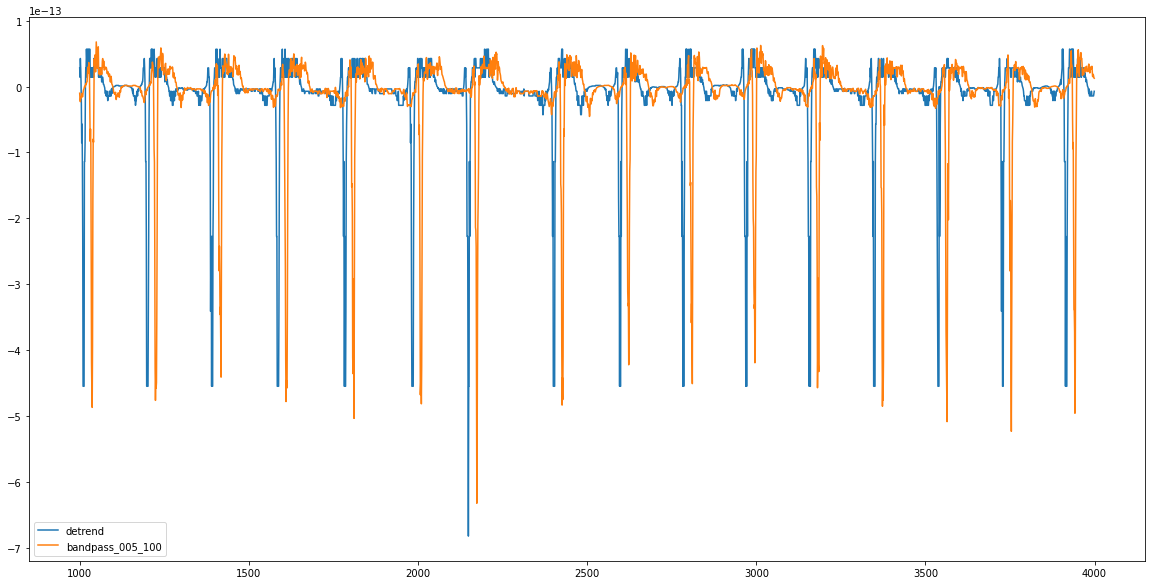

In [19]:

df_a00_001_reset_index.iloc[1000:4000, [2,3]].plot(figsize=(20,10))
plt.legend(loc='best')
plt.xlim=(0,1000)

In [20]:
border_0 = np.full(len(df_a00_001_reset_index['bandpass_005_100']), 0)
display(border_0)
border_6 = np.full(len(df_a00_001_reset_index['bandpass_005_100']), 6)
display(border_6)

array([0, 0, 0, ..., 0, 0, 0])

array([6, 6, 6, ..., 6, 6, 6])

In [21]:
#peaks, properties = signal.find_peaks(df_a00_001_reset_index['bandpass_005_100'], distance=150, height=(0, 6))
peaks, properties = signal.find_peaks(df_a00_001_reset_index['bandpass_005_100'], distance=120, height=(border_0,border_6))
display(peaks)

array([  87,  299,  449,  644,  863, 1049, 1240, 1429, 1633, 1856, 2063,
       2231, 2440, 2629, 2830, 3013, 3196, 3387, 3589, 3744, 3952, 4151,
       4364, 4519, 4740, 4935, 5112, 5308, 5495, 5712, 5908, 6055, 6275,
       6489, 6703, 6839, 7051, 7238, 7426, 7605, 7800, 7989, 8172, 8408,
       8574, 8804, 8944])

In [22]:
display(np.diff(peaks))
peaks_diff = np.diff(peaks)

array([212, 150, 195, 219, 186, 191, 189, 204, 223, 207, 168, 209, 189,
       201, 183, 183, 191, 202, 155, 208, 199, 213, 155, 221, 195, 177,
       196, 187, 217, 196, 147, 220, 214, 214, 136, 212, 187, 188, 179,
       195, 189, 183, 236, 166, 230, 140])

In [23]:
x_peaks = np.linspace(0, len(peaks), len(peaks))
display(x_peaks)

array([ 0.        ,  1.02173913,  2.04347826,  3.06521739,  4.08695652,
        5.10869565,  6.13043478,  7.15217391,  8.17391304,  9.19565217,
       10.2173913 , 11.23913043, 12.26086957, 13.2826087 , 14.30434783,
       15.32608696, 16.34782609, 17.36956522, 18.39130435, 19.41304348,
       20.43478261, 21.45652174, 22.47826087, 23.5       , 24.52173913,
       25.54347826, 26.56521739, 27.58695652, 28.60869565, 29.63043478,
       30.65217391, 31.67391304, 32.69565217, 33.7173913 , 34.73913043,
       35.76086957, 36.7826087 , 37.80434783, 38.82608696, 39.84782609,
       40.86956522, 41.89130435, 42.91304348, 43.93478261, 44.95652174,
       45.97826087, 47.        ])

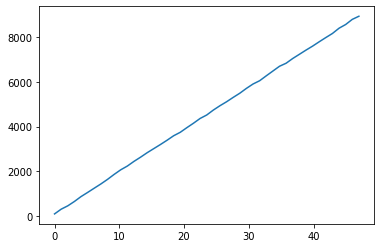

In [24]:
plt.plot(x_peaks, peaks)

In [25]:
x_peaks_diff = np.linspace(0, len(peaks_diff), len(peaks_diff))
display(x_peaks_diff)

array([ 0.        ,  1.02222222,  2.04444444,  3.06666667,  4.08888889,
        5.11111111,  6.13333333,  7.15555556,  8.17777778,  9.2       ,
       10.22222222, 11.24444444, 12.26666667, 13.28888889, 14.31111111,
       15.33333333, 16.35555556, 17.37777778, 18.4       , 19.42222222,
       20.44444444, 21.46666667, 22.48888889, 23.51111111, 24.53333333,
       25.55555556, 26.57777778, 27.6       , 28.62222222, 29.64444444,
       30.66666667, 31.68888889, 32.71111111, 33.73333333, 34.75555556,
       35.77777778, 36.8       , 37.82222222, 38.84444444, 39.86666667,
       40.88888889, 41.91111111, 42.93333333, 43.95555556, 44.97777778,
       46.        ])

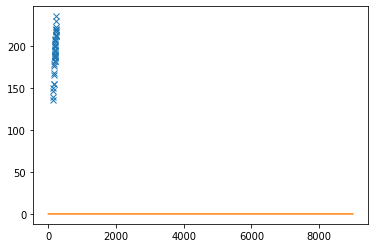

In [26]:
plt.plot(peaks_diff, df_a00_001_reset_index.index[peaks_diff], "x");
plt.plot(df_a00_001_reset_index['bandpass_005_100'])

In [27]:
print(np.ndim(df_a00_001_reset_index['bandpass_005_100']))

1


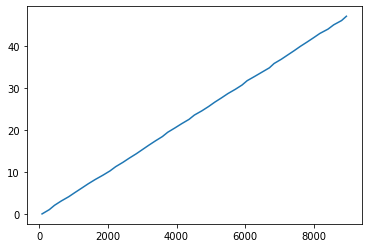

In [28]:
plt.plot(peaks, x_peaks)

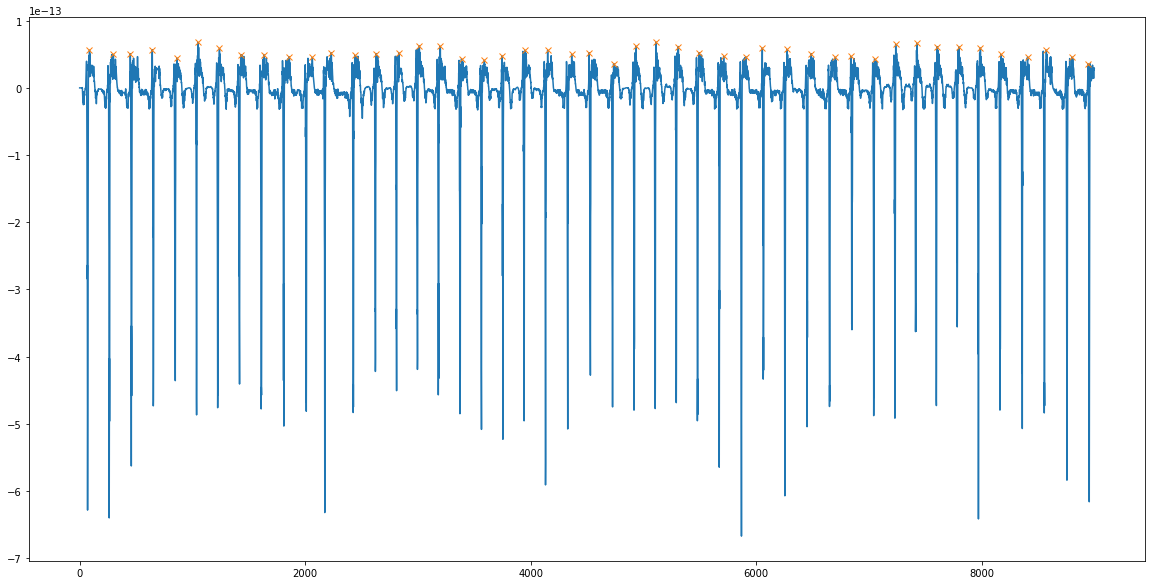

In [29]:
plt.figure(figsize=(20, 10))

plt.plot(df_a00_001_reset_index['bandpass_005_100'])
plt.plot(peaks, df_a00_001_reset_index['bandpass_005_100'][peaks], "x")